In [9]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-BRYN\SERVER1;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

In [11]:
cursor = conn.cursor()

In [12]:
query = 'SELECT * FROM SalesQuarterCategories'

In [13]:
SalesCountryCat = pd.read_sql(query, conn)

C:\Users\new user\AppData\Local\Temp\ipykernel_10392\2219564067.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SalesCountryCat = pd.read_sql(query, conn)


In [14]:
print(SalesCountryCat.head(6))

  CountryRegionCode    Group  SalesYear  SalesQuarter        Sales  \
0                AU  Pacific       2011             2  209652.9046   
1                AU  Pacific       2011             3  614525.1848   
2                AU  Pacific       2011             4  707978.2158   
3                AU  Pacific       2012             1  632631.0294   
4                AU  Pacific       2012             2  539001.9938   
5                AU  Pacific       2012             3  454775.1183   

     BikeSales  ComponentsSales  ClothingSales  AccessoriesSales         Cost  \
0  209652.9046              0.0            0.0               0.0  124544.4014   
1  614525.1848              0.0            0.0               0.0  368207.7080   
2  707978.2158              0.0            0.0               0.0  422822.1134   
3  632631.0294              0.0            0.0               0.0  377876.6608   
4  539001.9938              0.0            0.0               0.0  327364.3343   
5  454775.1183         

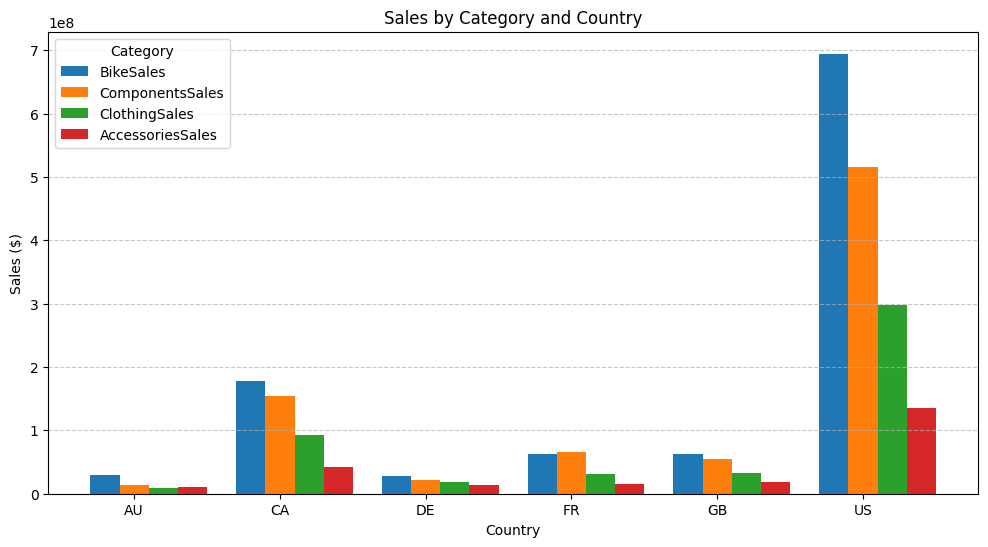

In [15]:

# I will just plot total sales over the 4 years so first I group all the data by country
SalesCountryCat = SalesCountryCat.groupby("CountryRegionCode", as_index=False).sum()

# Create a list of categories
categories = ["BikeSales", "ComponentsSales", "ClothingSales", "AccessoriesSales"]
num_categories = len(categories)

# Create x locations for each country
x = np.arange(len(SalesCountryCat["CountryRegionCode"].unique()))

# Define bar width
bar_width = 0.2  

# Create the figure
plt.figure(figsize=(12, 6))

# Plot each category with an offset
for i, category in enumerate(categories):
    plt.bar(x + i * bar_width, SalesCountryCat[category], width=bar_width, label=category)

# Customize axis labels and title
plt.xlabel("Country")
plt.ylabel("Sales ($)")
plt.title("Sales by Category and Country")
plt.xticks(x + bar_width, SalesCountryCat["CountryRegionCode"].unique())  # Center ticks between bars
plt.legend(title="Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)
